## Esercizio 1

In [4]:
import numpy as np
import scipy.linalg as  spl
import numpy.linalg as npl
import matplotlib.pyplot as plt
import sympy as sym

import sys, os

sys.path.append(os.path.abspath('../../Scheletri'))

import Schel_FULL as sf

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

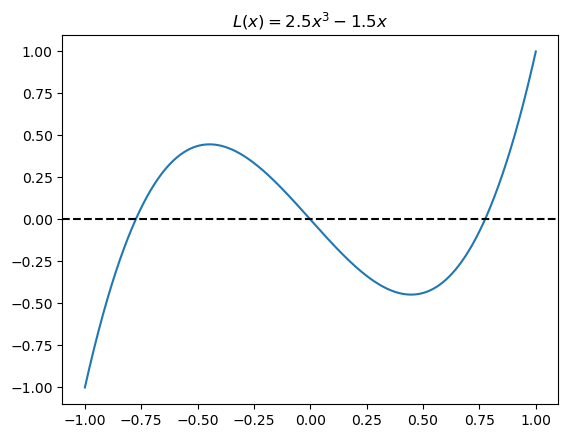

In [21]:
x0 = 1
tolx, tolf = (1e-12, 1e-12)
itmax = 1000

x = sym.symbols('x')

L_sym = 0.5*(5*x**3 -3*x)
Ld_sym = sym.diff(L_sym , x)

L = sym.lambdify(x, L_sym, np)
Ld = sym.lambdify(x, Ld_sym, np)

xx = np.linspace(-1, 1, 1000)

plt.title(f'$L(x) = {sym.latex(L_sym)}$')
plt.plot(xx, L(xx))
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

sol_NT, numit_NT, vec_sol_NT = sf.newton(L, Ld, x0, tolx, tolf, itmax)

Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

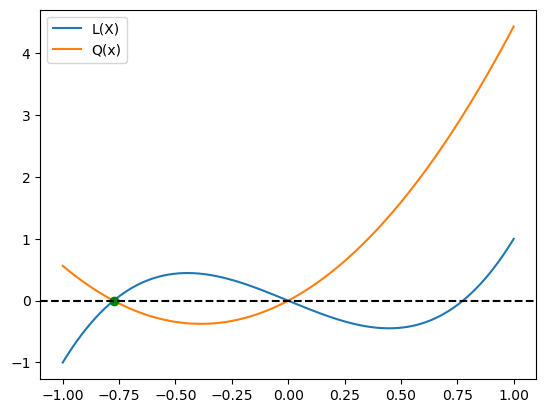

In [24]:
Q_sym = L(x)/(x-sol_NT)
Qd_sym = sym.diff(Q_sym, x)
Q = sym.lambdify(x, Q_sym, np)
Qd = sym.lambdify(x, Qd_sym, np)
x0_q = -0.5
yy_Q = Q(xx)

sol_NT_Q, numit_NT_Q, vec_sol_NT_Q = sf.newton(Q, Qd, x0_q, tolx, tolf, itmax)

plt.plot(xx, L(xx), label = 'L(X)')
plt.plot(xx, yy_Q, label = 'Q(x)')
plt.legend()
plt.plot(sol_NT_Q, Q(sol_NT_Q), 'go')
plt.axhline(0, color = 'black', linestyle = '--')
plt.show()

Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

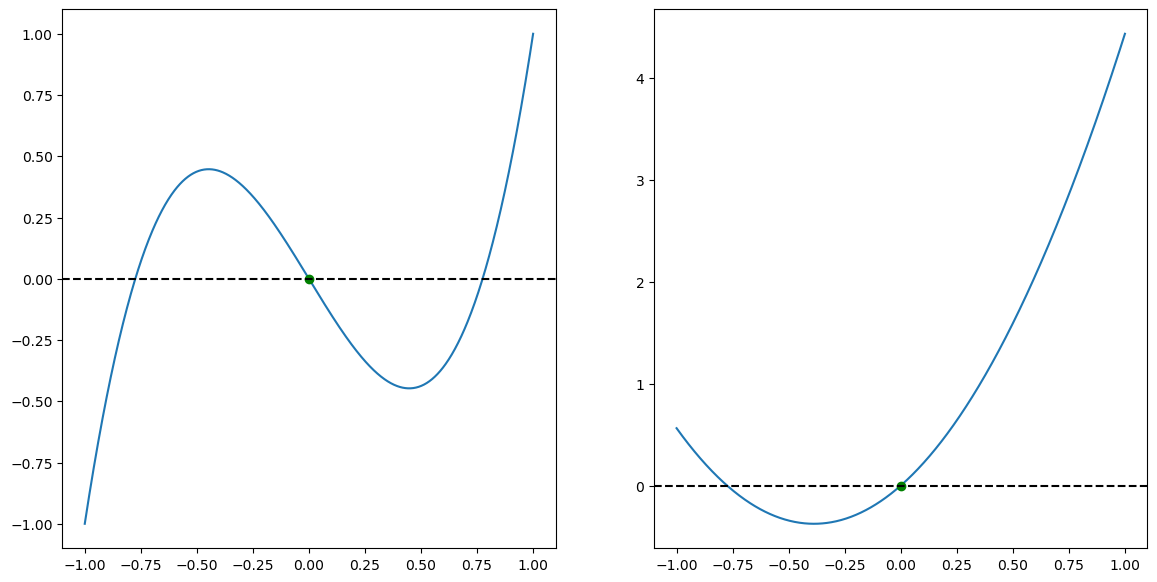

In [32]:
a, b = (-0.25, 0.25)
a_Q, b_Q = (-0.25, 0.25)

sol_bis, numit_bis, vec_sol_bis = sf.metodo_bisezione(L, a, b, tolx, tolf)

sol_bis_Q, numit_bis_Q, vec_sol_bis_Q = sf.metodo_bisezione(Q,a_Q, b_Q, tolx, tolf)

fig, ax = plt.subplots(1, 2, figsize= (14, 7))

ax[0].plot(xx, L(xx), label = 'L(X)')
ax[1].plot(xx, yy_Q, label = 'Q(x)')

ax[0].plot(sol_bis, L(sol_bis), 'go')
ax[1].plot(sol_bis_Q, Q(sol_bis_Q), 'go')
ax[0].axhline(0, color = 'black', linestyle = '--')
ax[1].axhline(0, color = 'black', linestyle = '--')



                                                                                                                Punti [14]